In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load datasets
isda = pd.read_csv('iSDA_soil_data_sand_silt_clay.csv')
ipage = pd.read_csv('2410_iPAGE_SoilData_241029.csv')


ipage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Area                   618 non-null    object 
 1   soil group             618 non-null    object 
 2   Land class             618 non-null    object 
 3   knit (surface)         461 non-null    object 
 4   pH                     618 non-null    object 
 5   SOC (%)                618 non-null    float64
 6   Nitrogen N (%)         618 non-null    object 
 7   Potassium K (meq/100)  618 non-null    object 
 8   Phosphorus P (ug/g)    618 non-null    object 
 9   Sulfur S (ug/g)        618 non-null    object 
 10  Boron B (ug/g)         618 non-null    object 
 11  Zinc Zn (ug/g)         618 non-null    object 
dtypes: float64(1), object(11)
memory usage: 58.1+ KB


In [23]:
isda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   longitude                2111 non-null   float64
 1   latitude                 2111 non-null   float64
 2   start_date               2111 non-null   object 
 3   end_date                 2111 non-null   object 
 4   source                   2111 non-null   object 
 5   horizon_lower            2111 non-null   int64  
 6   horizon_upper            2111 non-null   int64  
 7   aluminium_extractable    2109 non-null   float64
 8   boron_extractable        2111 non-null   float64
 9   calcium_extractable      2111 non-null   float64
 10  carbon_organic           2111 non-null   float64
 11  carbon_total             0 non-null      float64
 12  copper_extractable       2111 non-null   float64
 13  electrical_conductivity  2109 non-null   float64
 14  iron_extractable        

In [24]:
isda.drop(columns='carbon_total', inplace=True)
isda.dropna(inplace=True)
isda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2109 entries, 0 to 2108
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   longitude                2109 non-null   float64
 1   latitude                 2109 non-null   float64
 2   start_date               2109 non-null   object 
 3   end_date                 2109 non-null   object 
 4   source                   2109 non-null   object 
 5   horizon_lower            2109 non-null   int64  
 6   horizon_upper            2109 non-null   int64  
 7   aluminium_extractable    2109 non-null   float64
 8   boron_extractable        2109 non-null   float64
 9   calcium_extractable      2109 non-null   float64
 10  carbon_organic           2109 non-null   float64
 11  copper_extractable       2109 non-null   float64
 12  electrical_conductivity  2109 non-null   float64
 13  iron_extractable         2109 non-null   float64
 14  magnesium_extractable    2109

In [25]:
# Rename columns to be more concise
ipage.rename(columns={'soil group': 'Soil group',
                   'knit (surface)': 'Soil type',
                   'SOC (%)': 'SOC',
                   'Nitrogen N (%)': 'Nitrogen',
                   'Potassium K (meq/100)': 'Potassium',
                   'Phosphorus P (ug/g)': 'Phosphorus',
                   'Sulfur S (ug/g)': 'Sulfur',
                   'Boron B (ug/g)': 'Boron',
                   'Zinc Zn (ug/g)': 'Zinc'},
            inplace=True)

isda.rename(columns={'boron_extractable': 'Boron',
                     'carbon_organic': 'SOC',
                     'nitrogen_total': 'Nitrogen',
                     'ph': 'pH',
                     'phosphorus_extractable': 'Phosphorus',
                     'potassium_extractable': 'Potassium',
                     'sulphur_extractable': 'Sulfur',
                     'zinc_extractable': 'Zinc',
                     'sand': 'Sand',
                     'silt': 'Silt',
                     'clay': 'Clay'},
            inplace=True)

# Numerical features to compare
numerical_cols = ['pH', 'Nitrogen', 'Phosphorus', 'Potassium', 'Sulfur', 'SOC', 'Zinc', 'Boron']

# Change object type to numeric
for feature in numerical_cols:
    ipage[feature] = pd.to_numeric(ipage[feature], errors='coerce')

ipage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        618 non-null    object 
 1   Soil group  618 non-null    object 
 2   Land class  618 non-null    object 
 3   Soil type   461 non-null    object 
 4   pH          616 non-null    float64
 5   SOC         618 non-null    float64
 6   Nitrogen    610 non-null    float64
 7   Potassium   616 non-null    float64
 8   Phosphorus  616 non-null    float64
 9   Sulfur      617 non-null    float64
 10  Boron       591 non-null    float64
 11  Zinc        617 non-null    float64
dtypes: float64(8), object(4)
memory usage: 58.1+ KB


In [26]:
isda['Potassium'] /= 390
isda['SOC'] /= 10
isda['Nitrogen'] /= 10

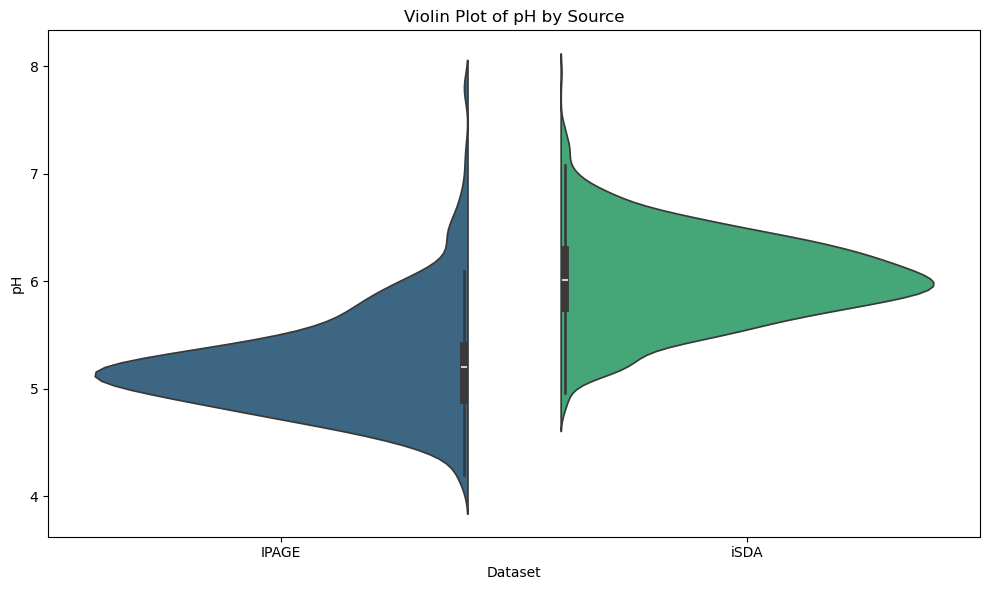

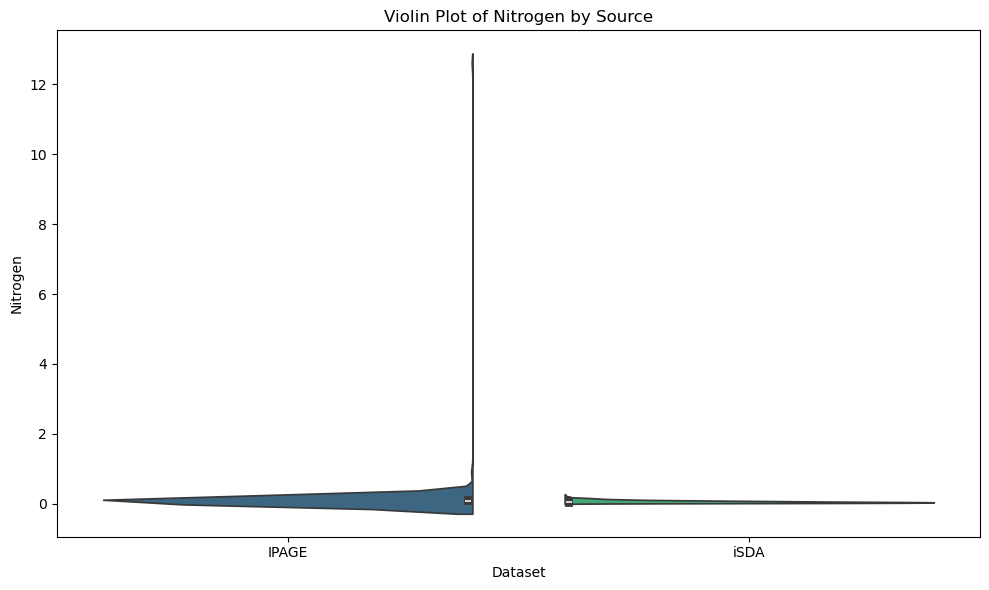

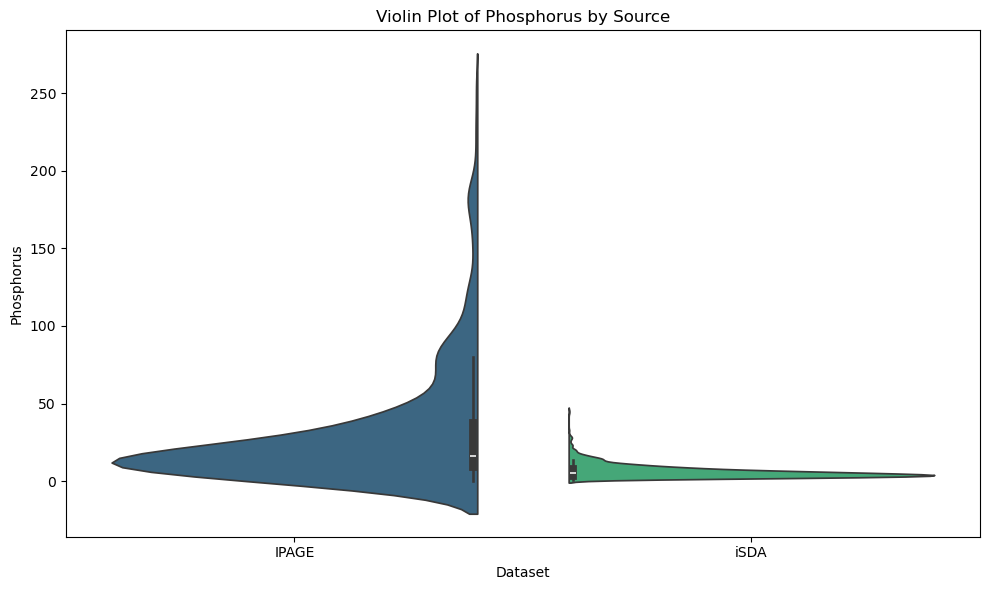

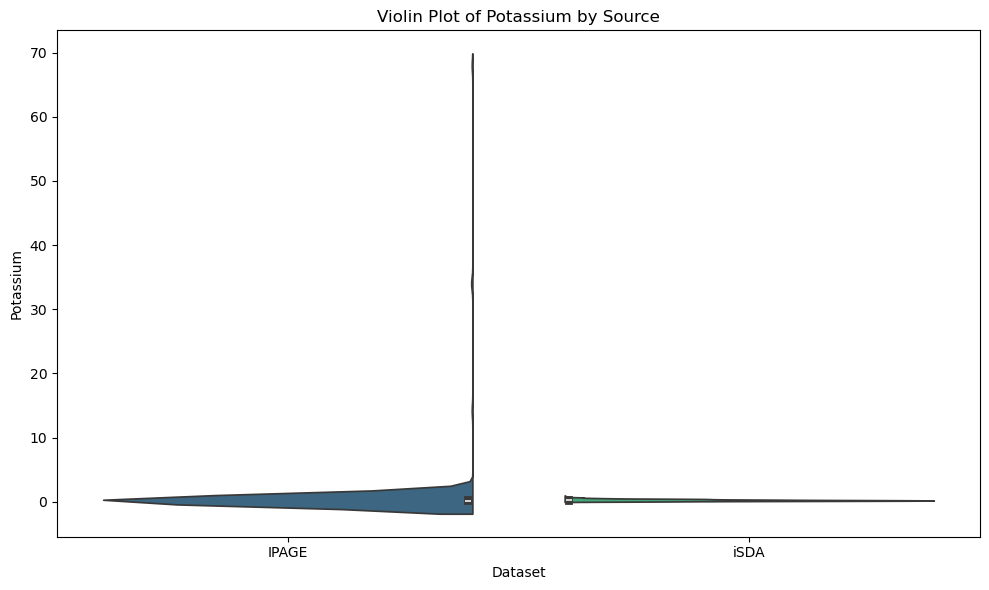

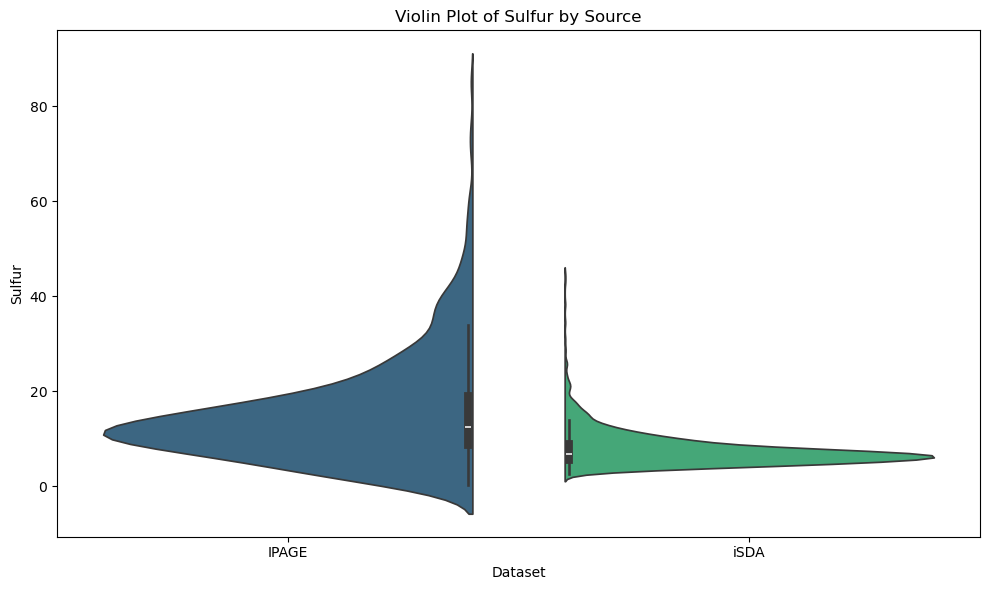

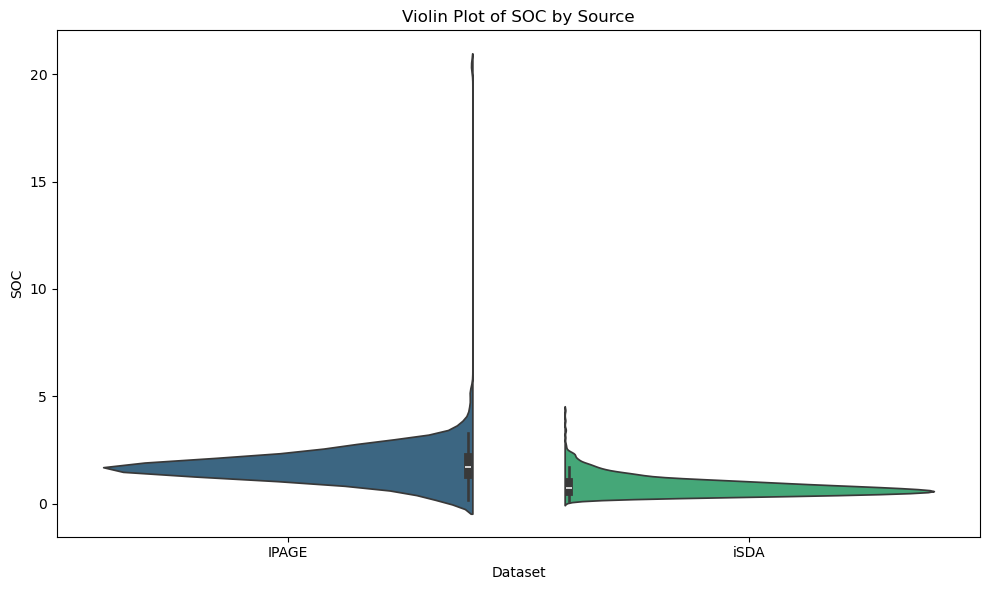

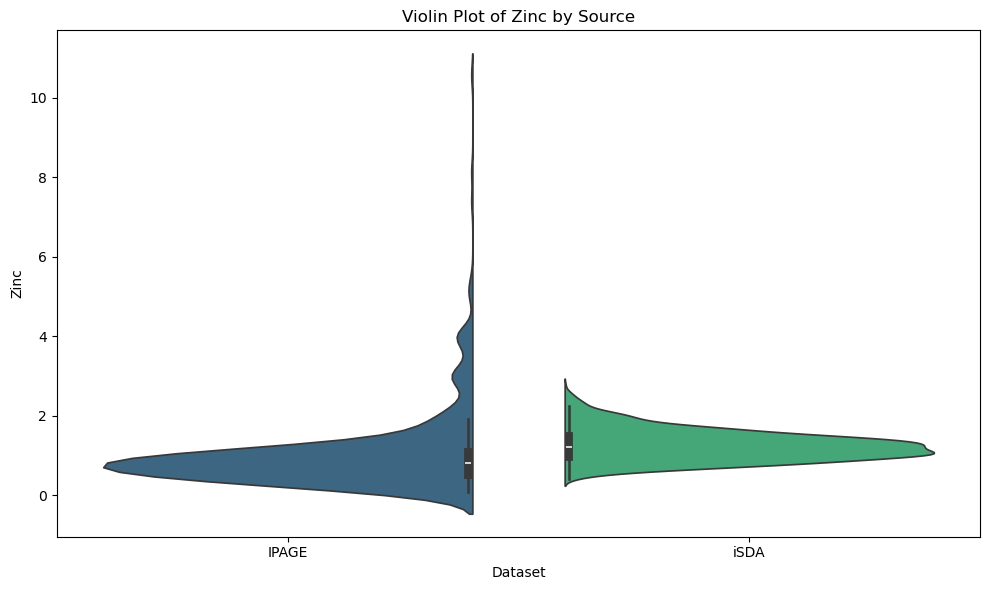

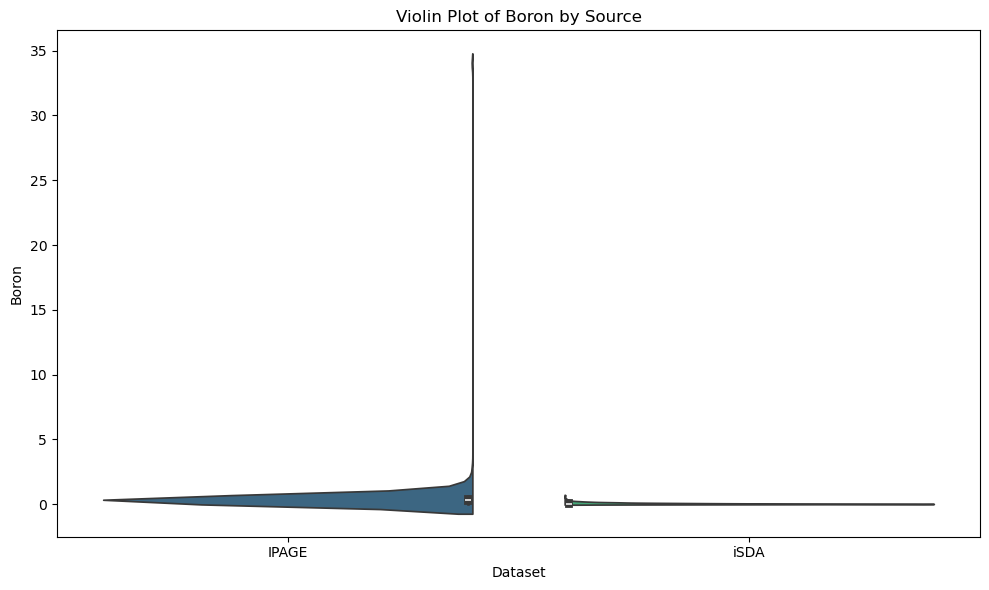

In [27]:
# Combine the datasets with an additional 'Source' column
ipage['Source'] = 'IPAGE'
isda['Source'] = 'iSDA'

# Combine the two datasets for plotting
combined_df = pd.concat([ipage, isda], ignore_index=True)

# Create violin plots for each feature
for feature in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.violinplot(
        data=combined_df,
        x='Source',
        y=feature,
        legend=False,
        split=True,
        hue='Source',
        palette='viridis',
    )
    plt.title(f"Violin Plot of {feature} by Source")
    plt.xlabel('Dataset')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

### Dropping some of the more extreme outliers to get a better comparison of the distributions

In [28]:
# Filter out extreme outliers for better visualization
filtered_df = combined_df[
    (combined_df['Boron'] < 4.0) &
    (combined_df['Zinc'] < 5.0) &
    (combined_df['SOC'] < 5.0) &
    (combined_df['Sulfur'] < 60.0) &
    (combined_df['Nitrogen'] < 3.0) &
    (combined_df['Potassium'] < 5.0)
]

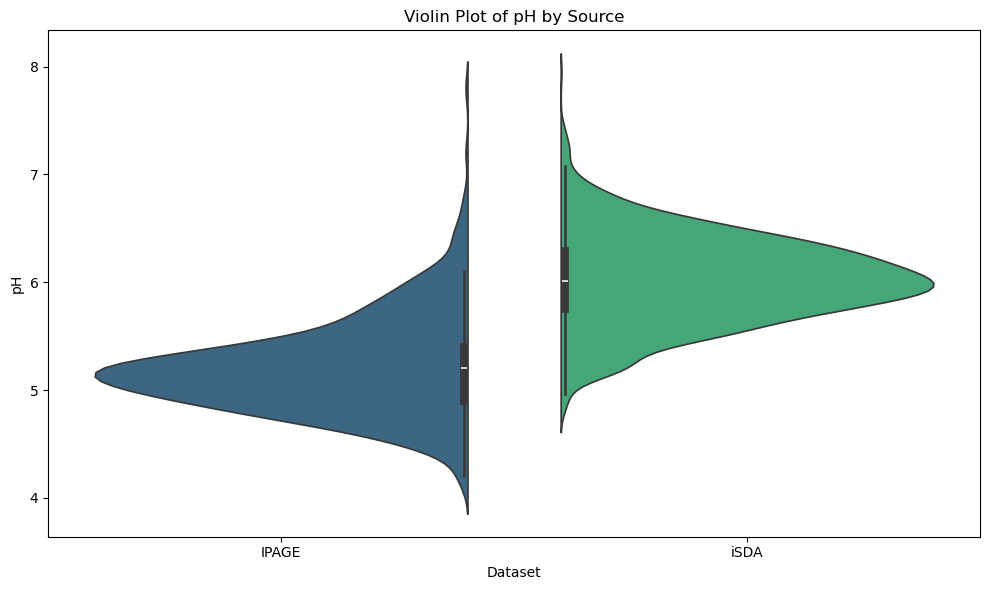

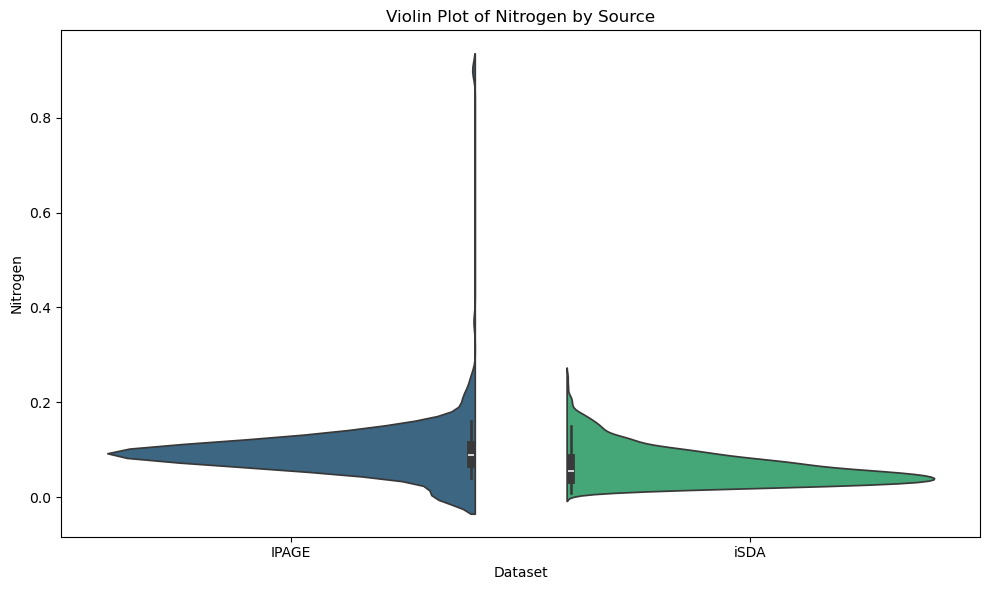

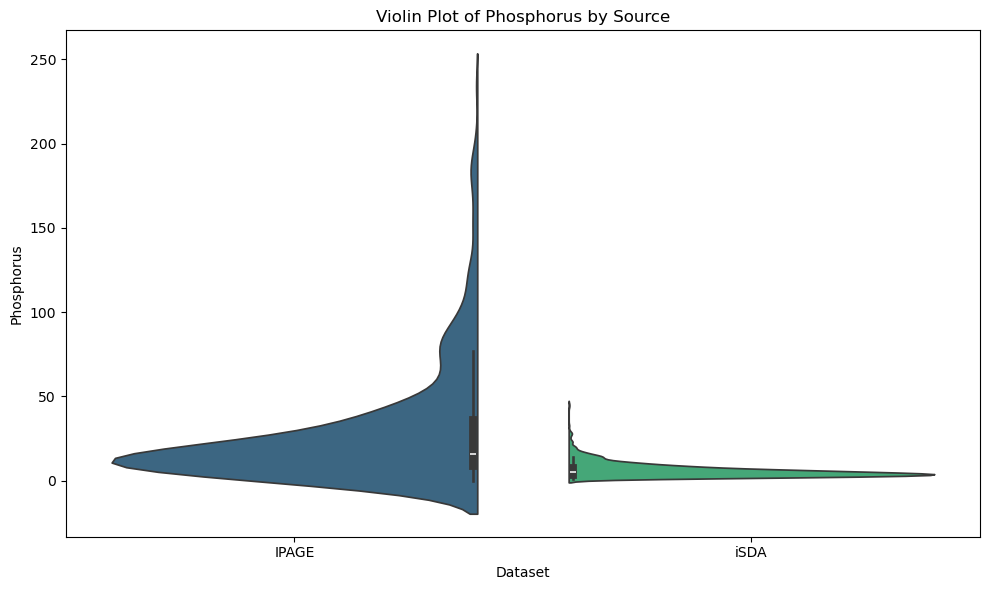

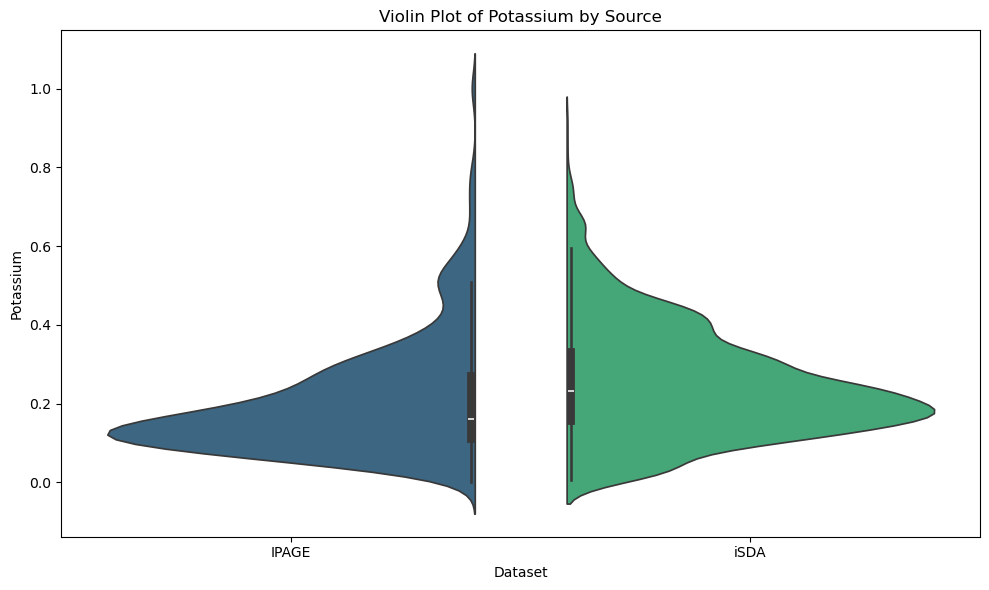

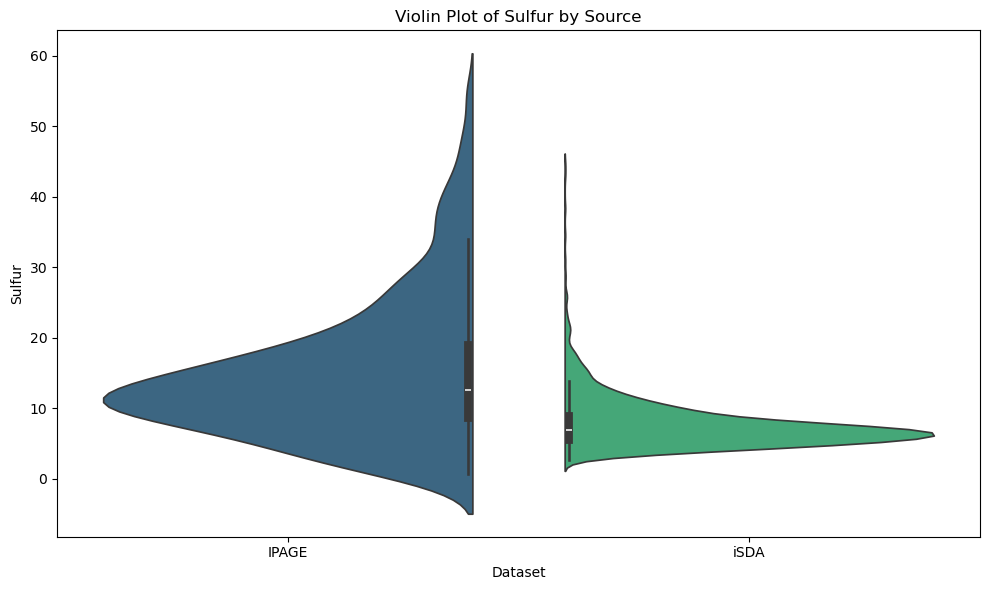

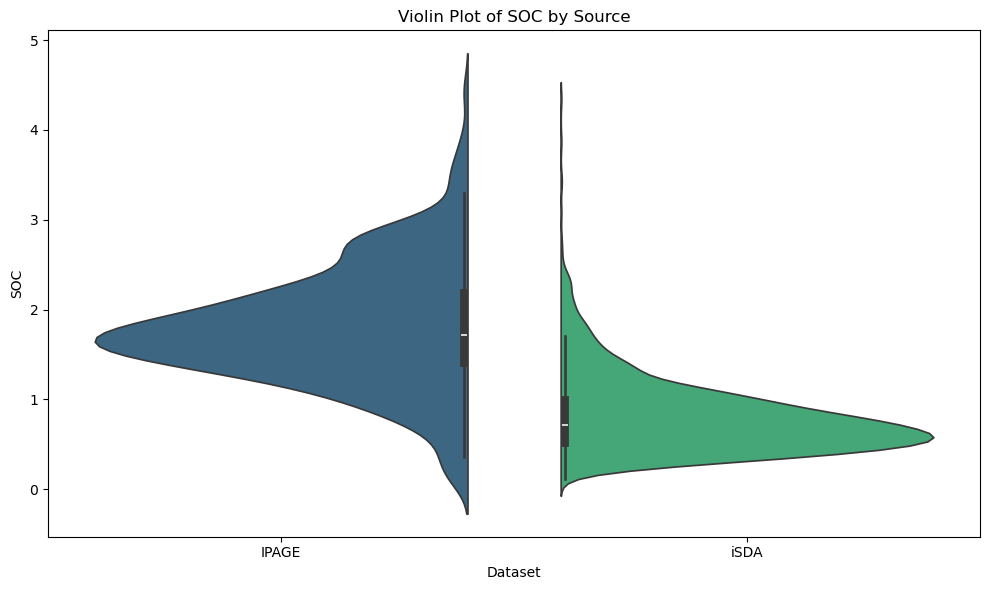

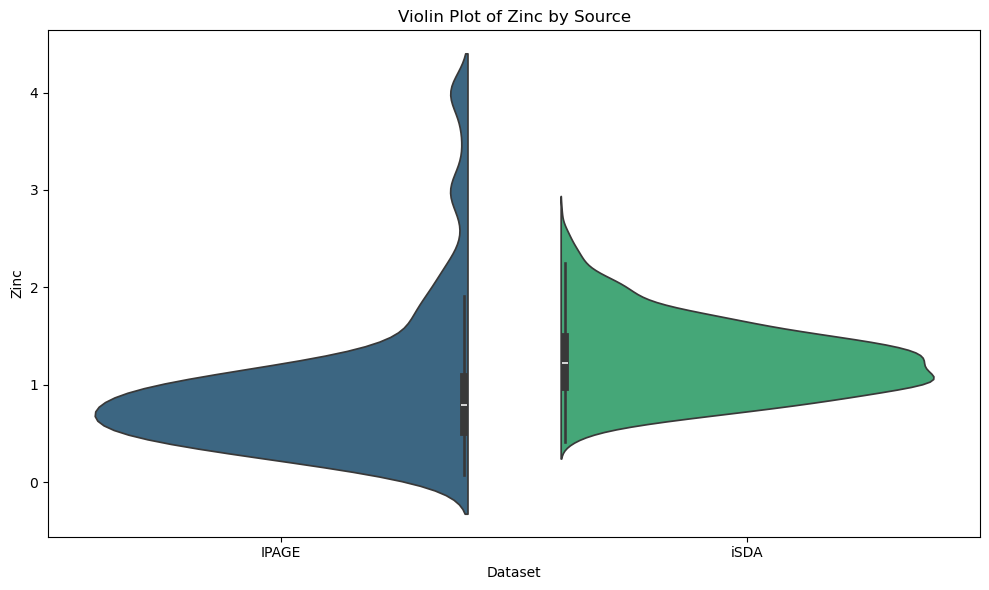

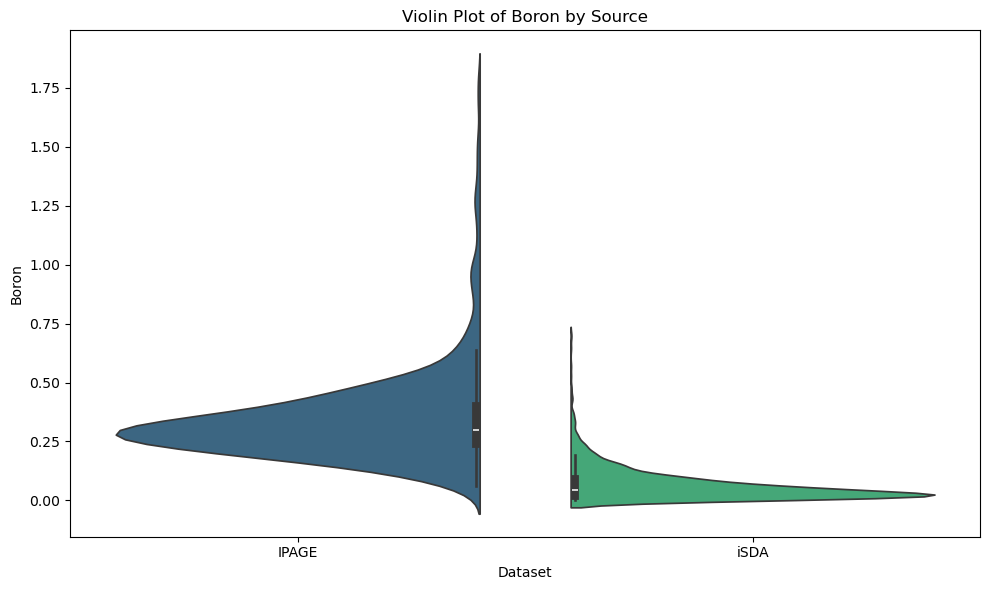

In [29]:
# Create violin plots for each feature
for feature in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.violinplot(
        data=filtered_df,
        x='Source',
        y=feature,
        legend=False,
        split=True,
        hue='Source',
        palette='viridis',
    )
    plt.title(f"Violin Plot of {feature} by Source")
    plt.xlabel('Dataset')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

### Checking to see if null values for Soil type (knit) are just in one Area, Soil group or Land class

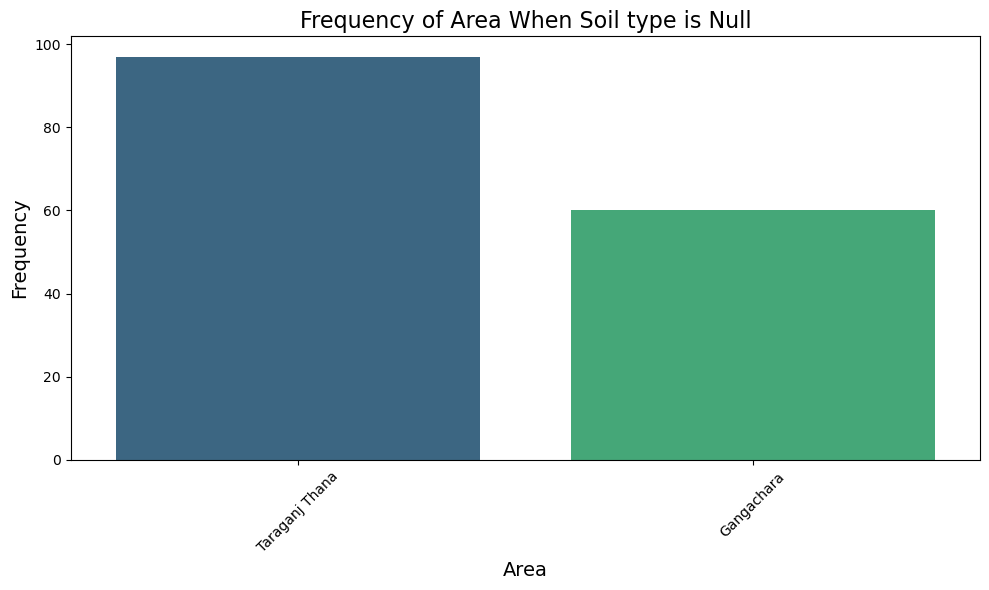

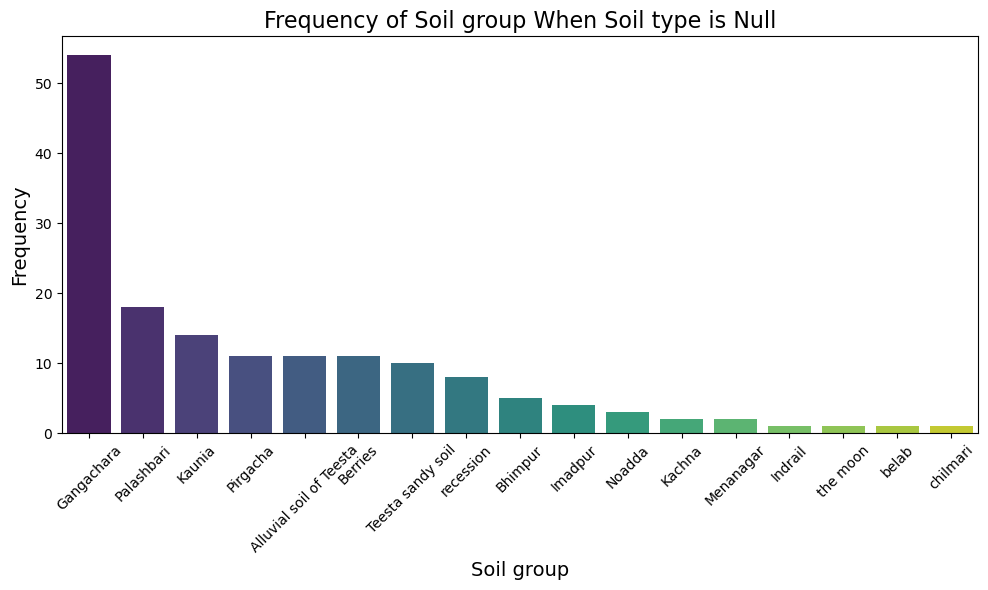

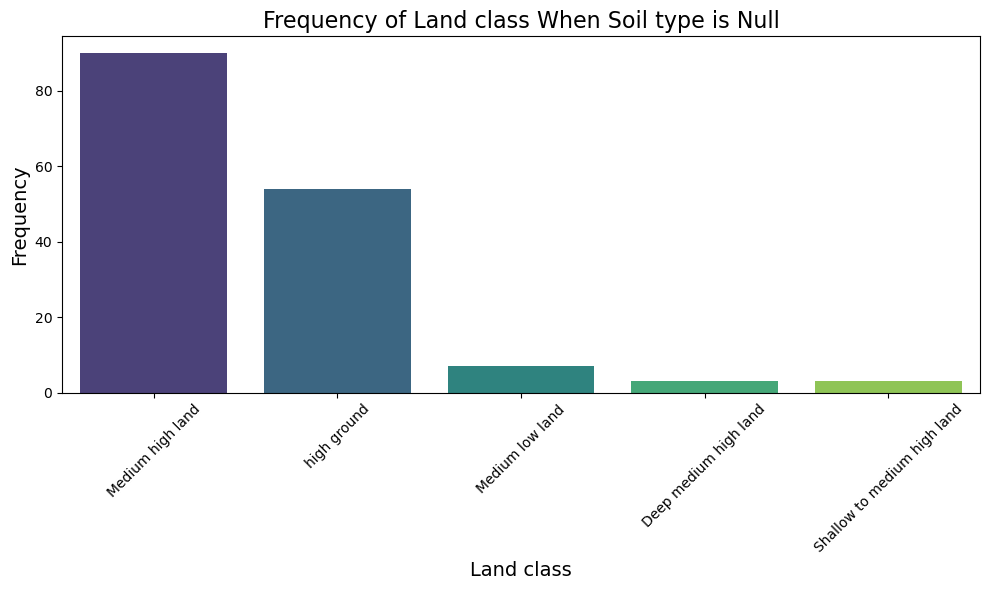

In [30]:
# Create categorical features list
categorical_cols = ['Area', 'Soil group', 'Land class', 'Soil type']
# Create list to check Soil type against
categorical_check = ['Area', 'Soil group', 'Land class']

# Add null check column
null_check_column = 'Soil type'

# Filter rows where the specified column is null
null_filtered_ipage = ipage[ipage[null_check_column].isnull()]

# Create frequency counts for each categorical column
for col in categorical_check:
    value_counts = null_filtered_ipage[col].value_counts()

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=value_counts.index,
                y=value_counts.values,
                hue=value_counts.index,
                palette='viridis',
               legend=False)
    plt.title(f"Frequency of {col} When {null_check_column} is Null", fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Probably best to just put unknown for null Soil type entries

In [31]:
# Fill nulls for unknown Soil type to conserve data
ipage['Soil type'] = ipage['Soil type'].fillna('unknown')

# Create map for Soil type
soil_mapping = {
    'loam': {'sand': 40.0,'silt': 40.0,'clay': 20.0},
    'Clay loam ': {'sand': 33.0,'silt': 33.0,'clay': 33.0},
    'loam clay': {'sand': 33.0,'silt': 33.0,'clay': 33.0},
    'brick': {'sand': 20.0,'silt': 20.0,'clay': 60.0},
    'in the sand': {'sand': 80.0,'silt': 10.0,'clay': 10.0},
    'unknown': {'sand': 33.0,'silt': 33.0,'clay': 33.0}
}

# Create columns to split Soil type in to % Sand, Silt and Clay
ipage['Sand'] = ipage['Soil type'].map(lambda x: soil_mapping[x]['sand'])
ipage['Silt'] = ipage['Soil type'].map(lambda x: soil_mapping[x]['silt'])
ipage['Clay'] = ipage['Soil type'].map(lambda x: soil_mapping[x]['clay'])

# Drop nulls and unnecessary Source column
ipage.dropna(inplace=True)
ipage.drop(columns='Source', inplace=True)
ipage.info()

<class 'pandas.core.frame.DataFrame'>
Index: 581 entries, 0 to 616
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        581 non-null    object 
 1   Soil group  581 non-null    object 
 2   Land class  581 non-null    object 
 3   Soil type   581 non-null    object 
 4   pH          581 non-null    float64
 5   SOC         581 non-null    float64
 6   Nitrogen    581 non-null    float64
 7   Potassium   581 non-null    float64
 8   Phosphorus  581 non-null    float64
 9   Sulfur      581 non-null    float64
 10  Boron       581 non-null    float64
 11  Zinc        581 non-null    float64
 12  Sand        581 non-null    float64
 13  Silt        581 non-null    float64
 14  Clay        581 non-null    float64
dtypes: float64(11), object(4)
memory usage: 72.6+ KB


In [32]:
# Drop unnecessary columns
isda.drop(columns=['start_date',
                   'end_date',
                   'source',
                   'horizon_lower',
                   'horizon_upper',
                   'aluminium_extractable',
                   'calcium_extractable',
                   'copper_extractable',
                   'electrical_conductivity',
                   'iron_extractable',
                   'magnesium_extractable',
                   'manganese_extractable',
                   'sodium_extractable',
                   'Source'],
          inplace=True)

# Fill categorical columns with isda as placeholder
for col in categorical_cols:
    isda[col] = 'isda'

isda.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2109 entries, 0 to 2108
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   longitude   2109 non-null   float64
 1   latitude    2109 non-null   float64
 2   Boron       2109 non-null   float64
 3   SOC         2109 non-null   float64
 4   Nitrogen    2109 non-null   float64
 5   pH          2109 non-null   float64
 6   Phosphorus  2109 non-null   float64
 7   Potassium   2109 non-null   float64
 8   Sulfur      2109 non-null   float64
 9   Zinc        2109 non-null   float64
 10  Sand        2109 non-null   float64
 11  Silt        2109 non-null   float64
 12  Clay        2109 non-null   float64
 13  Area        2109 non-null   object 
 14  Soil group  2109 non-null   object 
 15  Land class  2109 non-null   object 
 16  Soil type   2109 non-null   object 
dtypes: float64(13), object(4)
memory usage: 296.6+ KB


In [33]:
# Export to .csv
ipage.to_csv('ipage_final.csv', index=False)
isda.to_csv('isda_final.csv', index=False)

In [41]:
merged_data = pd.read_csv('merged_v1.csv')
merged_data.head()

,longitude,latitude,Area,Soil group,Land class,Soil type,pH,SOC,Nitrogen,Potassium,Phosphorus,Sulfur,Boron,Zinc,Sand,Silt,Clay
0,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,5.0,1.27,0.08,0.15,19.6,37.7,0.26,0.86,33.0,33.0,33.0
1,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,4.9,1.47,0.09,0.25,4.1,32.0,0.25,0.75,33.0,33.0,33.0
2,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,4.6,1.07,0.05,0.09,13.3,13.5,0.27,0.95,33.0,33.0,33.0
3,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,5.2,1.51,0.06,0.30,20.2,30.0,0.28,1.00,33.0,33.0,33.0
4,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,5.3,1.08,0.11,0.17,20.5,27.8,0.30,1.04,33.0,33.0,33.0


In [42]:
merged_data.loc[merged_data['Area'] == 'isda', 'Potassium'] /= 390
merged_data.loc[merged_data['Area'] == 'isda', 'SOC'] /= 10
merged_data.loc[merged_data['Area'] == 'isda', 'Nitrogen'] /= 10

filtered_merge = merged_data[
    (merged_data['Boron'] < 1.0) &
    (merged_data['Zinc'] < 5.0) &
    (merged_data['SOC'] < 5.0) &
    (merged_data['Sulfur'] < 40.0) &
    (merged_data['Nitrogen'] < 0.3) &
    (merged_data['Potassium'] < 5.0) &
    (merged_data['Phosphorus'] < 75.0)
]

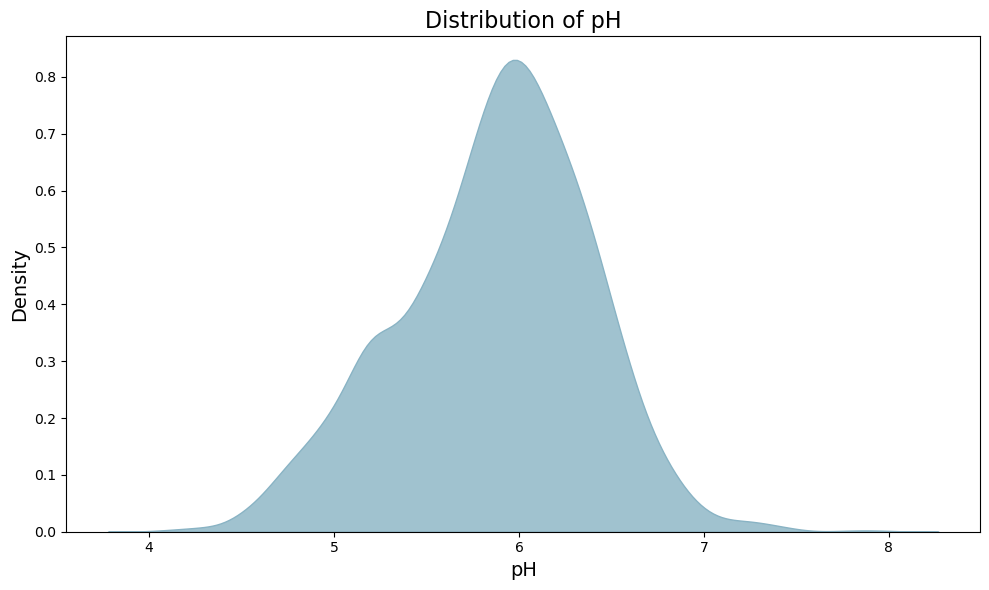

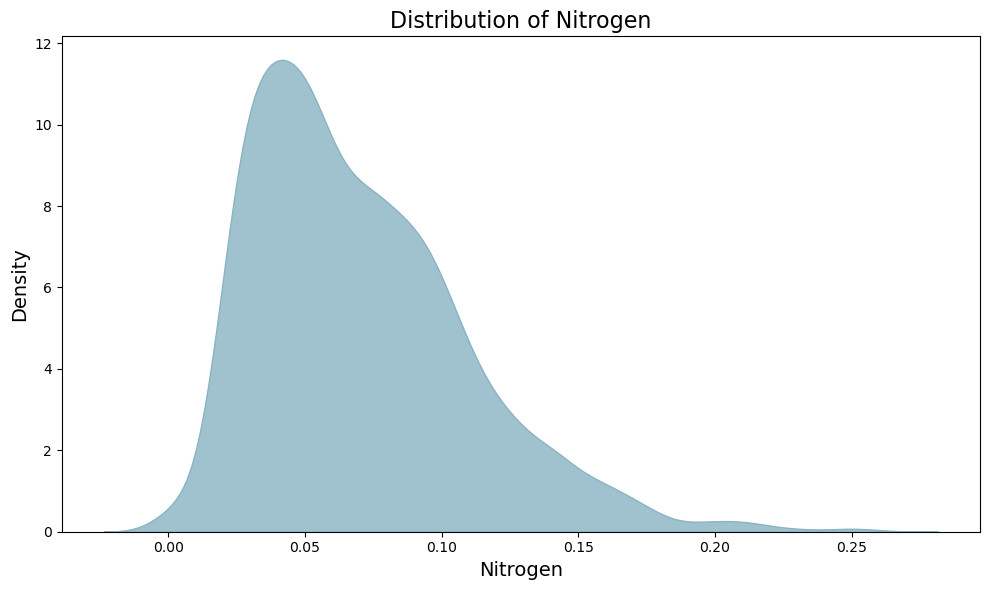

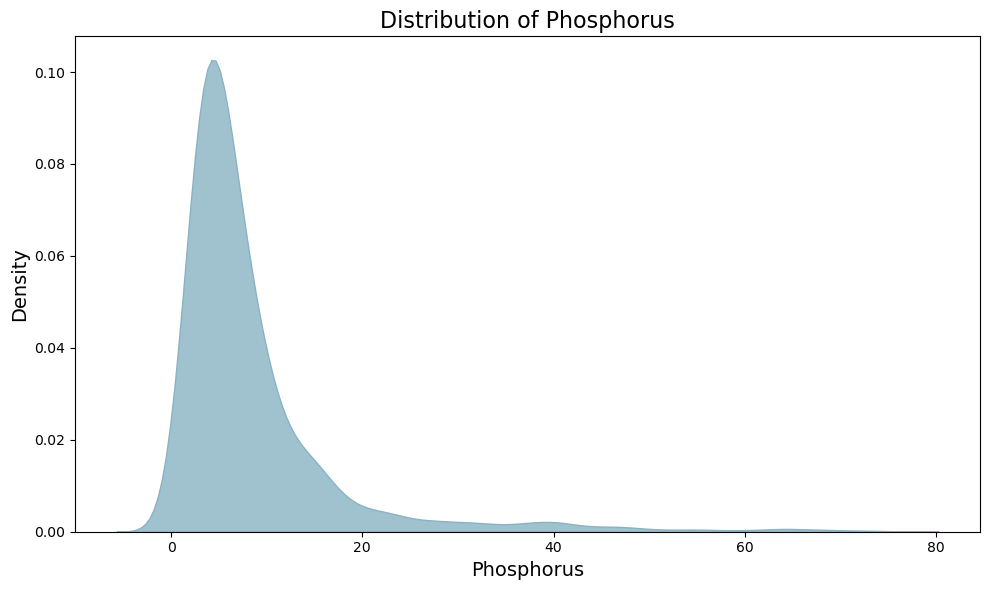

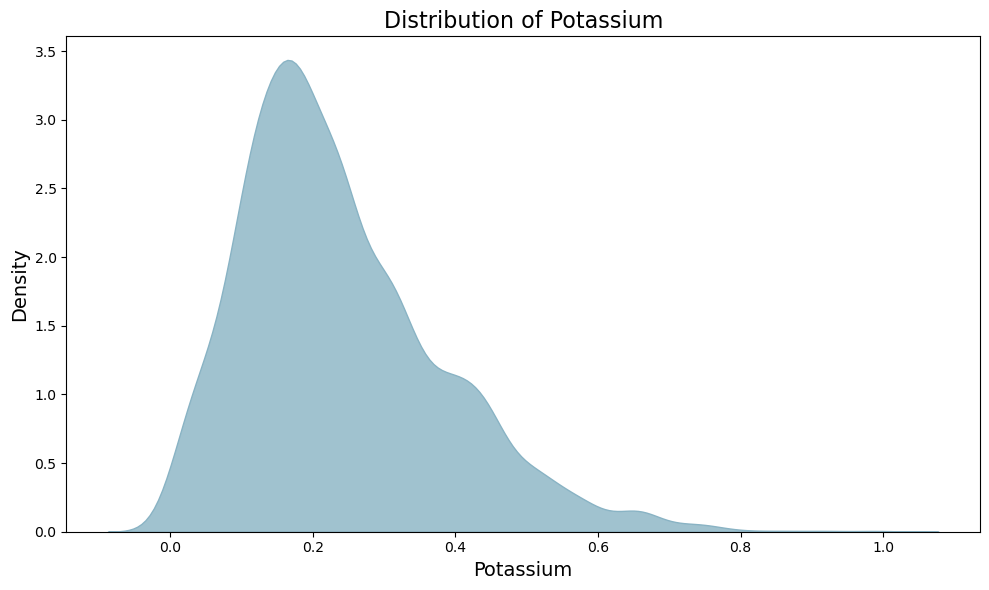

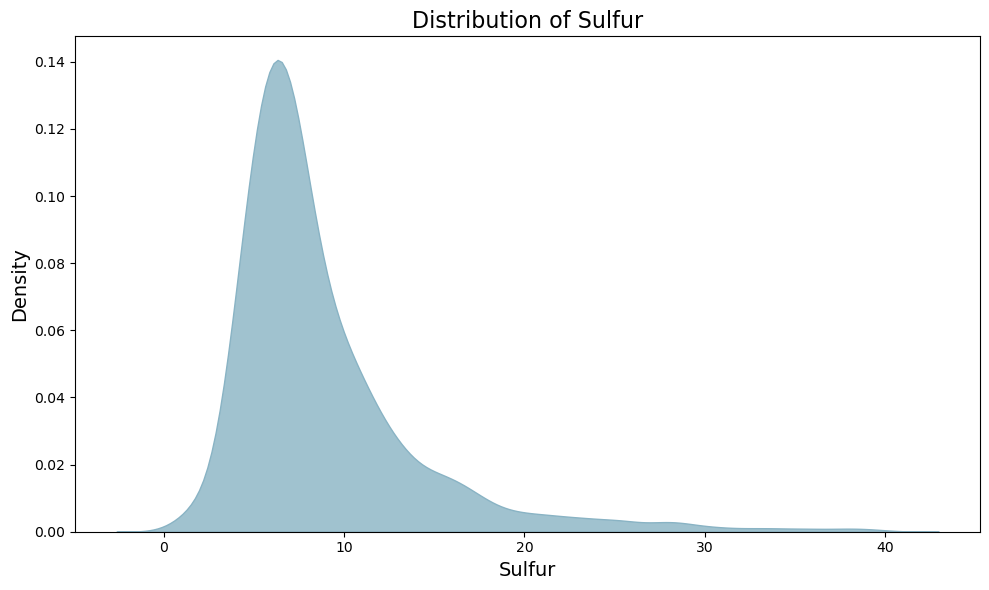

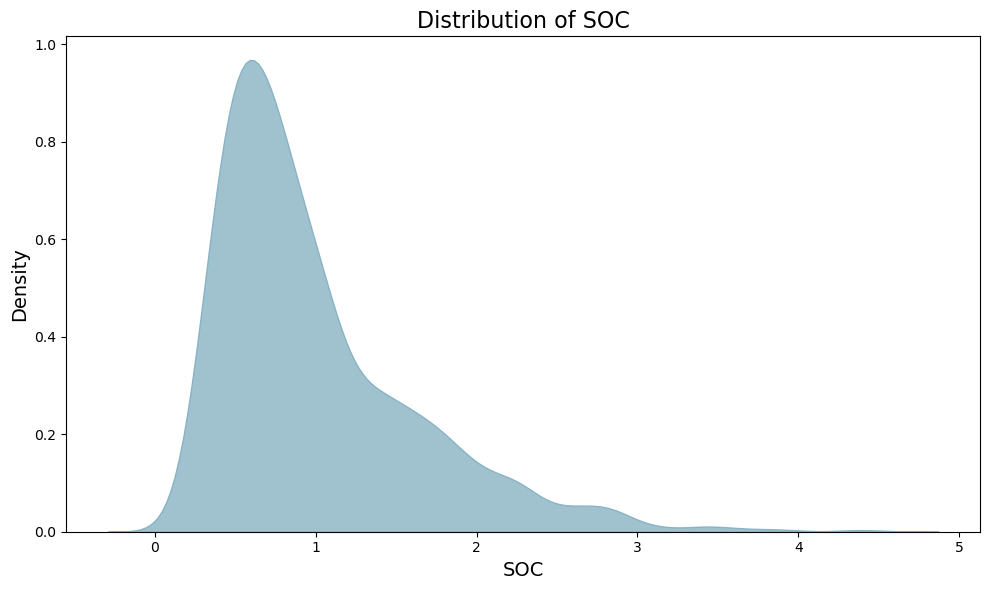

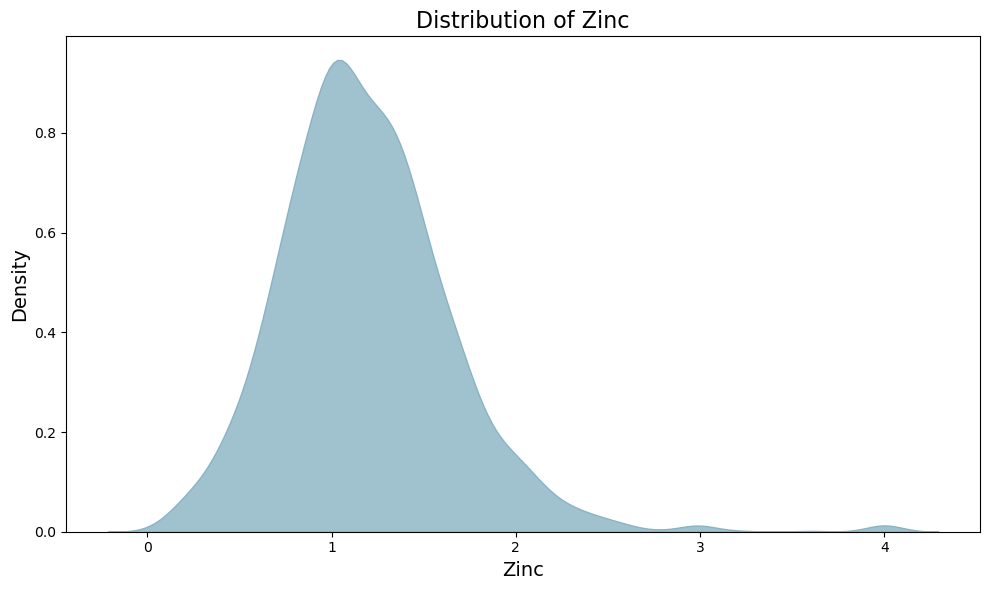

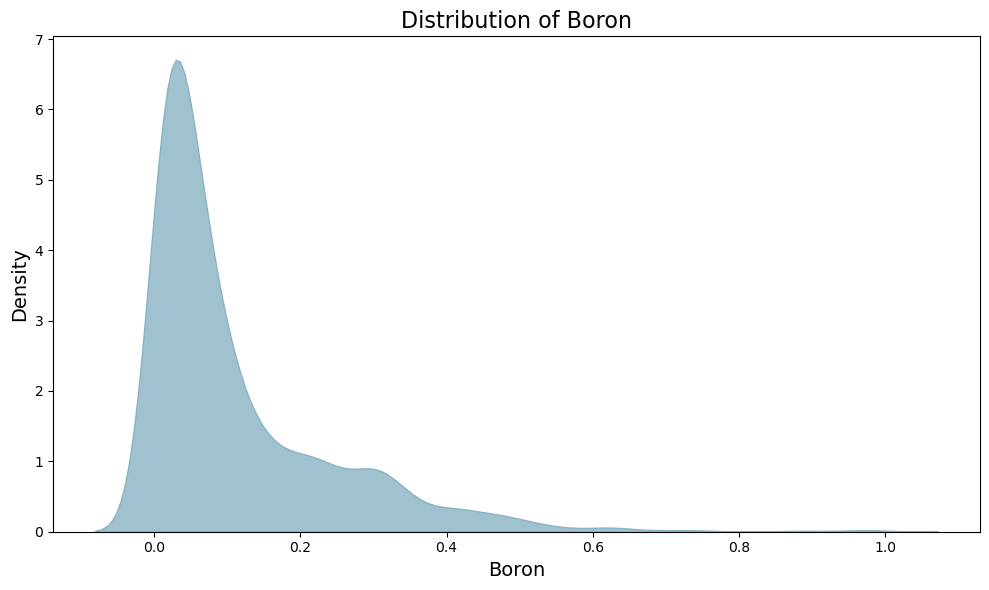

In [44]:
for feature in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=filtered_merge, x=feature, fill=True, color="#89B3C4", alpha=0.8)
    plt.title(f"Distribution of {feature}", fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.tight_layout()
    plt.show()

In [45]:
filtered_merge.to_csv('merged_v2.csv', index=False)

In [46]:
df = pd.read_csv('merged_v2.csv')

# Strip off the trailing white space
df['Soil group'] = df['Soil group'].str.strip()

# Check to see that there are no duplicate groups now
print("Unique values after stripping:\n", df['Soil group'].unique())

Unique values after stripping:
 ['belab' 'Noadda' 'Sahapur' 'the moon' 'the pen' 'Khilgaon' 'Pirgacha'
 'Palashbari' 'Berries' 'Gangachara' 'Kaunia' 'Imadpur'
 'Alluvial soil of Teesta' 'Teesta sandy soil' 'Kachna' 'The militants'
 'Chilmari' 'Saghata' 'recession' 'Menanagar' 'Bhimpur' 'Indrail'
 'chilmari' 'isda']


In [47]:
# Replace 'chilmari' with 'Chilmari' in the column
df['Soil group'] = df['Soil group'].replace('chilmari', 'Chilmari')

print(df['Soil group'].unique())


['belab' 'Noadda' 'Sahapur' 'the moon' 'the pen' 'Khilgaon' 'Pirgacha'
 'Palashbari' 'Berries' 'Gangachara' 'Kaunia' 'Imadpur'
 'Alluvial soil of Teesta' 'Teesta sandy soil' 'Kachna' 'The militants'
 'Chilmari' 'Saghata' 'recession' 'Menanagar' 'Bhimpur' 'Indrail' 'isda']


In [48]:
df.to_csv('merged_v2.csv', index=False)